# Analyzing trend

#### 1. Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C(i) With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.

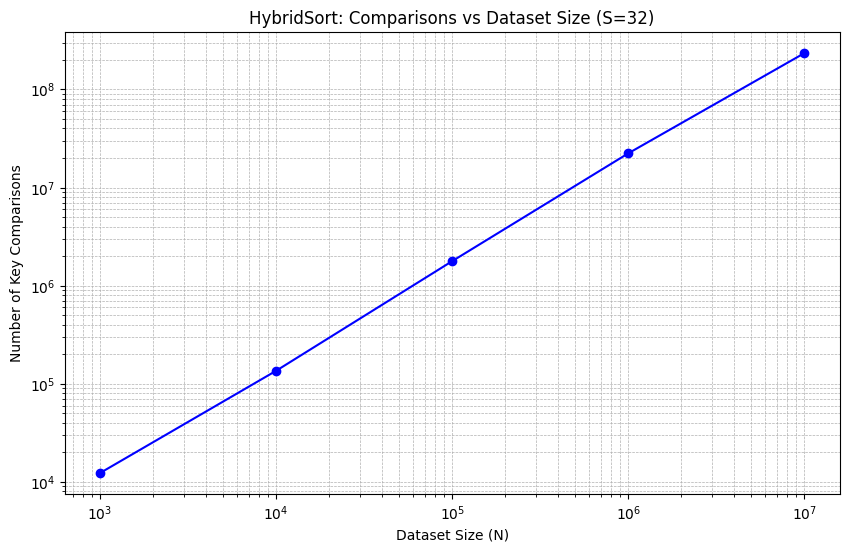

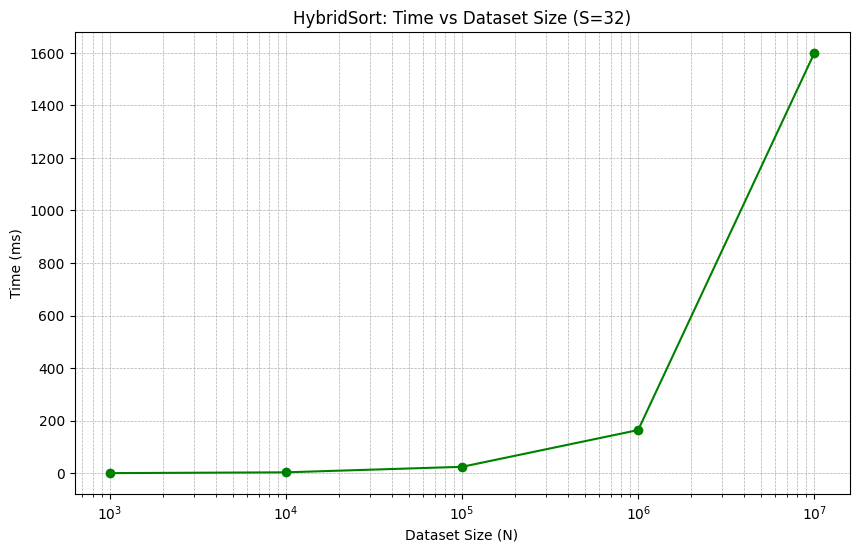

In [2]:
# Load CSV
csv_file = "partC_i.csv"  # replace with your file
df = pd.read_csv(csv_file)

# If you have a fixed S, you can filter by it
fixed_S = 32
df = df[df['S Value'] == fixed_S]

# Plot Comparisons vs N
plt.figure(figsize=(10, 6))
plt.plot(df['Dataset Size'], df['Comparisons'], marker='o', linestyle='-', color='blue')
plt.xscale('log')  # log scale for N
plt.yscale('log')  # optional: log scale for comparisons
plt.xlabel('Dataset Size (N)')
plt.ylabel('Number of Key Comparisons')
plt.title(f'HybridSort: Comparisons vs Dataset Size (S={fixed_S})')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Plot Time vs N
plt.figure(figsize=(10, 6))
plt.plot(df['Dataset Size'], df['Time (ms)'], marker='o', linestyle='-', color='green')
plt.xscale('log')  # log scale for N
plt.xlabel('Dataset Size (N)')
plt.ylabel('Time (ms)')
plt.title(f'HybridSort: Time vs Dataset Size (S={fixed_S})')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

c (ii) With the input size n fixed, plot the number of key comparisons over different values of S. 

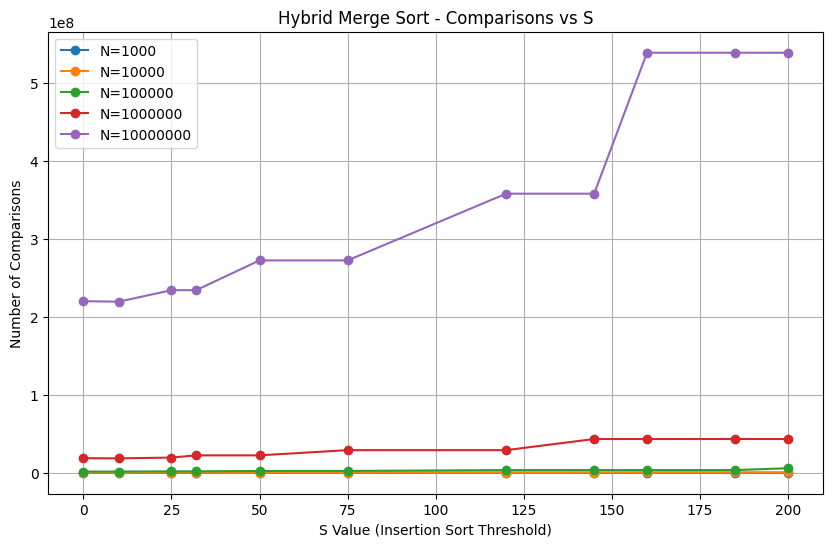

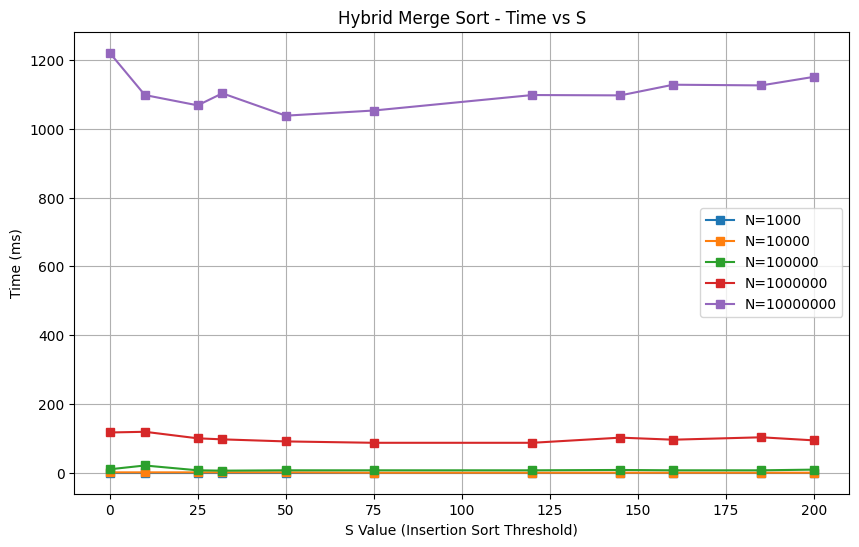

In [3]:
# Load CSV
df = pd.read_csv("partC_ii.csv")

# Get unique dataset sizes
dataset_sizes = df["Dataset Size"].unique()

# --- Plot Comparisons vs S for each N ---
plt.figure(figsize=(10, 6))
for n in dataset_sizes:
    subset = df[df["Dataset Size"] == n]
    plt.plot(subset["S Value"], subset["Comparisons"], marker='o', label=f"N={n}")

plt.xlabel("S Value (Insertion Sort Threshold)")
plt.ylabel("Number of Comparisons")
plt.title("Hybrid Merge Sort - Comparisons vs S")
plt.legend()
plt.grid(True)
plt.savefig("comparisons_vs_S.png", dpi=300)
plt.show()

# --- Plot Time vs S for each N ---
plt.figure(figsize=(10, 6))
for n in dataset_sizes:
    subset = df[df["Dataset Size"] == n]
    plt.plot(subset["S Value"], subset["Time (ms)"], marker='s', label=f"N={n}")

plt.xlabel("S Value (Insertion Sort Threshold)")
plt.ylabel("Time (ms)")
plt.title("Hybrid Merge Sort - Time vs S")
plt.legend()
plt.grid(True)
plt.savefig("time_vs_S.png", dpi=300)
plt.show()


c (iii) Using different sizes of input datasets, study how to determine an optimal value of S.

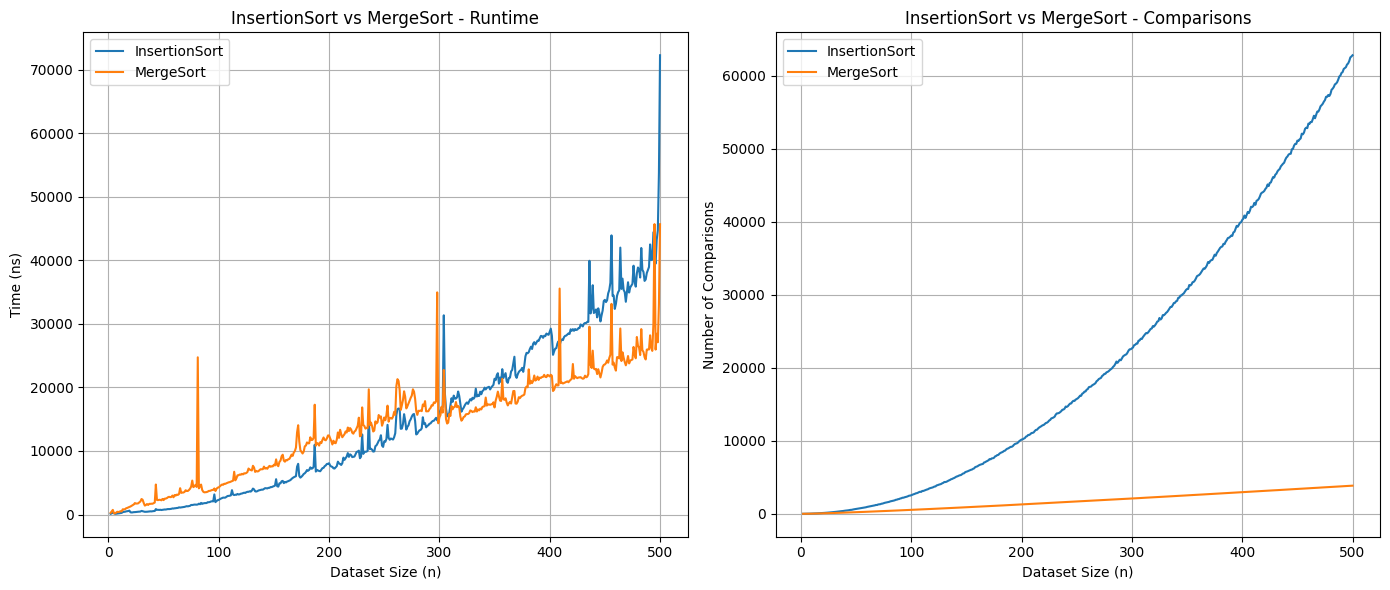

In [23]:
# Load CSV
df = pd.read_csv("crossover_results.csv")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# --- Plot Runtime ---
axes[0].plot(df["Dataset Size"], df["InsertionSort Time (ns)"], label="InsertionSort")
axes[0].plot(df["Dataset Size"], df["MergeSort Time (ns)"], label="MergeSort")
axes[0].set_xlabel("Dataset Size (n)")
axes[0].set_ylabel("Time (ns)")
axes[0].set_title("InsertionSort vs MergeSort - Runtime")
axes[0].legend()
axes[0].grid(True)

# --- Plot Comparisons ---
axes[1].plot(df["Dataset Size"], df["InsertionSort Comparisons"], label="InsertionSort")
axes[1].plot(df["Dataset Size"], df["MergeSort Comparisons"], label="MergeSort")
axes[1].set_xlabel("Dataset Size (n)")
axes[1].set_ylabel("Number of Comparisons")
axes[1].set_title("InsertionSort vs MergeSort - Comparisons")
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()


(d) Compare with original Mergesort: Implement the original version of Mergesort. Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers

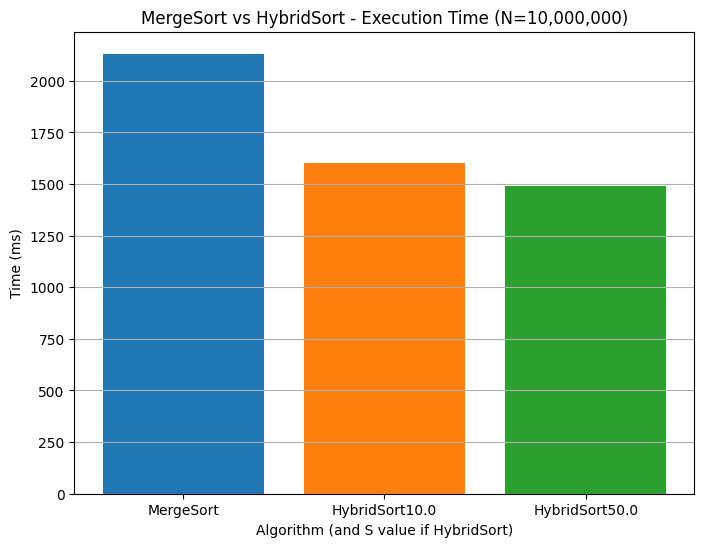

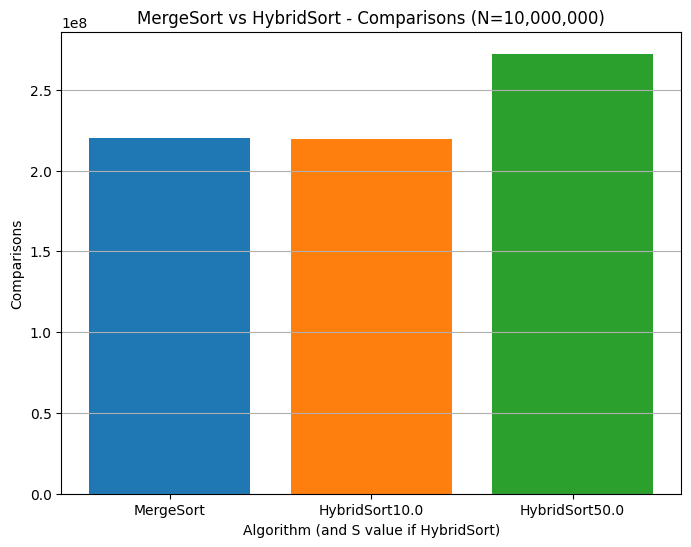

In [4]:
# Load CSV
df = pd.read_csv("merge_vs_hybrid.csv")

# --- Plot Time ---
plt.figure(figsize=(8, 6))
plt.bar(df["Algorithm"] + df["S Value"].fillna("").astype(str), df["Time (ms)"], color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Algorithm (and S value if HybridSort)")
plt.ylabel("Time (ms)")
plt.title("MergeSort vs HybridSort - Execution Time (N=10,000,000)")
plt.grid(axis="y")
plt.savefig("merge_vs_hybrid_time.png", dpi=300)
plt.show()

# --- Plot Comparisons ---
plt.figure(figsize=(8, 6))
plt.bar(df["Algorithm"] + df["S Value"].fillna("").astype(str), df["Comparisons"], color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Algorithm (and S value if HybridSort)")
plt.ylabel("Comparisons")
plt.title("MergeSort vs HybridSort - Comparisons (N=10,000,000)")
plt.grid(axis="y")
plt.savefig("merge_vs_hybrid_comparisons.png", dpi=300)
plt.show()
